#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
test = pd.read_csv('/content/drive/MyDrive/mnist_test.csv')
train = pd.read_csv('/content/drive/MyDrive/mnist_train.csv')

In [6]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

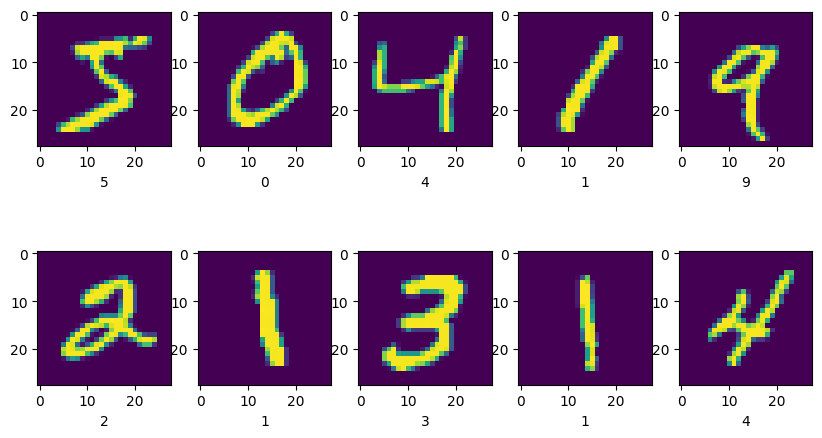

In [7]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [41]:

from numpy import exp
class ANN:
    def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_layers = num_layers
        self.num_of_nodes_layers = num_of_nodes_layers
        self.weights_biases = {}
        self.activations = {}
        self.initial_params()

    def initial_params(self):
        np.random.seed(20)
        self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
        self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        for i in range(2, self.num_layers + 1):
            self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
            self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

        self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
        self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

    def RELU(self, Z):
        return np.maximum(0, Z)

    def RELU_derivative(self, Z):
        return Z > 0

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return expZ / np.sum(expZ, axis=0, keepdims=True)

    def forward_propagation(self, X):
        self.activations['A0'] = X
        A = X
        for i in range(1, self.num_layers + 1):
            Z = np.dot(self.weights_biases[f'W{i}'], A) + self.weights_biases[f'b{i}']
            A = self.RELU(Z)
            self.activations[f'A{i}'] = A

        Z = np.dot(self.weights_biases[f'W{self.num_layers + 1}'], A) + self.weights_biases[f'b{self.num_layers + 1}']
        A = self.softmax(Z)
        self.activations[f'A{self.num_layers + 1}'] = A

        return A, self.activations

    def one_hot_encode(self, y):
        one_hot_Y = np.zeros((y.max() + 1, y.size))
        one_hot_Y[y, np.arange(y.size)] = 1
        return one_hot_Y

    def total_loss(self, y_pred, Y):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(y_pred)) / m
        return loss

    def backward_prop(self, y_pred, Y):
        gradients = {}
        dA = - (Y - y_pred)
        m = Y.shape[1]
        for i in reversed(range(1, self.num_layers + 2)):
            dZ = dA
            A_prev = self.activations[f'A{i-1}'] if i > 1 else self.activations['A0']
            gradients[f'dW{i}'] = (1/m) * np.dot(dZ, A_prev.T)
            gradients[f'db{i}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            if i > 1:
              W = self.weights_biases[f'W{i}']
              dA = np.dot(W.T, dZ) * (A_prev > 0)
        return gradients

    def update_params(self, gradients):
        for i in range(1, self.num_layers + 2):
            self.weights_biases[f'W{i}'] -= self.learning_rate * gradients[f'dW{i}']
            self.weights_biases[f'b{i}'] -= self.learning_rate * gradients[f'db{i}']

    def train(self, X, y, num_iterations):
        Y = self.one_hot_encode(y)
        for i in range(num_iterations):
            y_pred, _ = self.forward_propagation(X)
            gradients = self.backward_prop(y_pred, Y)
            self.update_params(gradients)
            if i % 100 == 0:
                loss = self.total_loss(y_pred, Y)
                print(f"Iteration {i}: Loss = {loss}")

    def predict(self, X):
        A, _ = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)
        return predictions


In [43]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration 0: Loss = 20.150952623082826
Iteration 100: Loss = 0.675680258398016
Iteration 200: Loss = 0.4858610399054646
Iteration 300: Loss = 0.40417507533274705
Iteration 400: Loss = 0.3282409254883864
Iteration 500: Loss = 0.29350434049380664
Iteration 600: Loss = 0.26527374409850946
Iteration 700: Loss = 0.25200914381582223
Iteration 800: Loss = 0.22564492873818776
Iteration 900: Loss = 0.21246648883805314
Iteration 1000: Loss = 0.2022056711550358
Iteration 1100: Loss = 0.1924915090730782
Iteration 1200: Loss = 0.18627839630277632
Iteration 1300: Loss = 0.18481161577866156
Iteration 1400: Loss = 0.17212530657545988
Iteration 1500: Loss = 0.16511260403070632
Iteration 1600: Loss = 0.16533714031451588
Iteration 1700: Loss = 0.15429405265754817
Iteration 1800: Loss = 0.15077396854939273
Iteration 1900: Loss = 0.14249708689471752
Iteration 2000: Loss = 0.13830892674059053
Iteration 2100: Loss = 0.13602186467275496
Iteration 2200: Loss = 0.1317226944047857
Iteration 2300: Loss = 0.128776

In [44]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 94.35 %


3


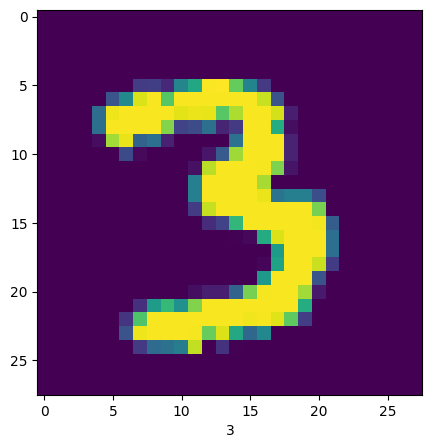

In [45]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
